# New Section

In [ ]:
!pip3 install transformers

     |████████████████████████████████| 1.9MB 5.7MB/s 
     |████████████████████████████████| 890kB 57.2MB/s 
     |████████████████████████████████| 3.2MB 61.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=c2b57bab58f72d8970cafec3efac7b0cfd2e6f21fc6c189ec7875e8011ec5182
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
!pip3 install sentencepiece

     |████████████████████████████████| 1.2MB 5.9MB/s 


In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer, AutoModelForSeq2SeqLM

In [ ]:
model_name = 'facebook/bart-large-cnn'

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
ARTICLE= """Picture this: a herd of elephants flies past you at sixty miles per hour, followed by a streak of tigers, a pride of lions, and a bunch of clowns. 
What do you see? It must be a circus train! One of the first uses of the circus train is credited to W.C. Coup. He 
partnered with P.T. Barnum in 1871 to expand the reach of their newly combined shows using 
locomotives. Before circus trains, these operators had to lug around all of their animals, 
performers, and equipment with a team of more than 600 horses. Since there were no highways, 
these voyages were rough and took a long time. Circuses would stop at many small towns 
between the large venues. Performing at many of these small towns was not very profitable. 
Because of these limitations, circuses could not grow as large as the imaginations of the 
operators. After they began using circus trains, Barnum and Coup only brought their show to 
large cities. These performances were much more profitable and the profits went toward creating 
an even bigger and better circus. Multiple rings were added and the show went on. Today, 
Ringling Bros. and Barnum and Bailey Circus still rely on the circus train to transport their 
astounding show, but now they use two."""
inputs = tokenizer.encode("summarize: " + ARTICLE, return_tensors="pt", truncation=True, max_length=512)
outputs = model.generate(inputs, max_length=150, min_length=40, num_beams=4, length_penalty=2.0, early_stopping=True)
print("Your summary: ")
print(tokenizer.decode(outputs[0]))

Your summary: 
</s><s>The first circus train was used by W.C. Coup and P.T. Barnum in 1871. The trains allowed them to expand the reach of their combined shows. Ringling Bros. and Barnum and Bailey Circus still rely on the circus train to transport their show.</s>


In [ ]:
!pip install ohmeow-blurr -q
!pip install datasets -q

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 14.5MB 248kB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 4.1MB 54.1MB/s 
     |████████████████████████████████| 184kB 72.5MB/s 
     |████████████████████████████████| 194kB 66.6MB/s 
     |████████████████████████████████| 245kB 72.6MB/s 
     |████████████████████████████████| 112kB 76.6MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 


In [ ]:
!pip install bert-score -q

     |████████████████████████████████| 61kB 3.5MB/s 


In [ ]:
import datasets
import pandas as pd
import seaborn as sns
from fastai.text.all import *
from transformers import *

from blurr.data.all import *
from blurr.modeling.all import *

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd 
path="/content/drive/MyDrive/Ahmed/trainDataPoints (1).csv"
df = pd.read_csv(path)

In [ ]:
df= df.iloc[0:10000]

# New Section

In [ ]:
#showing an example of dataset
#df = pd.read_csv('trainDataPoints (1).csv')
df.head(5)
#df = df.iloc[0:2000]

,tname,qType,col,row,data,stat,target
0,_2008_V8_Supercar_Championship_Series,1,-1,1,"Rd_:2.0;Race_Title:Eastern Creek;Circuit:Eastern Creek Raceway;City_State:Sydney , New South Wales;Date:7–9 March;Winner:Will Davison;Team:Dick Johnson Racing;Report:report;",NaN,"The Rd is 2.0, with a Race Title of Eastern Creek, and Eastern Creek Raceway is the Circuit, and the City State is Sydney , New South Wales"
1,_2010–11_Washington_State_Cougars_men_s_basketball_team,1,-1,10,"Name:DeAngelo Casto;Number:23.0;Last_School_College:Joel E. Ferris HS;Hometown:Spokane, WA;Weight:255.0;Height:6–8;Year:Junior;Position:Forward;",NaN,"The Name is DeAngelo Casto, with a Number of 23.0, and the Last School College is Joel E. Ferris HS, and Spokane, WA is the Hometown"
2,Nuremberg_Airport,2,4,-1,"year_2006:78,043;3,965,357;1,923,381;1,960,005;98,264;4,200",NaN,"Column year 2006 has 6 entries with uniques value between 78,043 and 4,200"
3,_2010–11_New_Jersey_Nets_season_2,1,-1,2,"Game:6.0;Date:November 6;Team:@ Miami;Score:L 89–101 (OT);High_points:Anthony Morrow (25);Location_Attendance:American Airlines Arena 19,600;Record:2–4;High_rebounds:Anthony Morrow , Terrence Williams (7);High_assists:Terrence Williams (9);",NaN,"The Game is 6.0, with a Date of November 6, and @ Miami is the Team, and with a Score of L 89–101 (OT), and Anthony Morrow (25) is the High points"
4,List_of_cities_in_the_Far_East_by_population_1,1,-1,54,"Rank:56.0;City:Xiamen;Population:2,225,000;Area_km²_:295.0;Country:China;Sources_of_Pop_Area:E / B;",NaN,"The Rank is 56.0, with a City of Xiamen, and 2,225,000 is the Population"


In [ ]:
df.head()

In [ ]:
#getting the required objects (the architecture, tokenizer, config, and model, using get_hf_objects helper method
pretrained_model_name = "facebook/bart-large-cnn"
hf_arch, hf_config, hf_tokenizer, hf_model = BLURR_MODEL_HELPER.get_hf_objects(pretrained_model_name, 
                                                                               model_cls=BartForConditionalGeneration)

hf_arch, type(hf_config), type(hf_tokenizer), type(hf_model)

('bart',
 transformers.models.bart.configuration_bart.BartConfig,
 transformers.models.bart.tokenization_bart_fast.BartTokenizerFast,
 transformers.models.bart.modeling_bart.BartForConditionalGeneration)

In [ ]:
#parameters dict generation with the default values 
text_gen_kwargs = default_text_gen_kwargs(hf_config, hf_model, task='summarization')
text_gen_kwargs

{'bad_words_ids': None,
 'bos_token_id': 0,
 'decoder_start_token_id': 2,
 'diversity_penalty': 0.0,
 'do_sample': False,
 'early_stopping': True,
 'encoder_no_repeat_ngram_size': 0,
 'eos_token_id': 2,
 'length_penalty': 2.0,
 'max_length': 142,
 'min_length': 56,
 'no_repeat_ngram_size': 3,
 'num_beam_groups': 1,
 'num_beams': 4,
 'num_return_sequences': 1,
 'output_attentions': False,
 'output_hidden_states': False,
 'output_scores': False,
 'pad_token_id': 1,
 'repetition_penalty': 1.0,
 'return_dict_in_generate': False,
 'temperature': 1.0,
 'top_k': 50,
 'top_p': 1.0,
 'use_cache': True}

In [ ]:
#customizing the text generation by changing values in text_gen_kwargs
hf_batch_tfm = HF_Seq2SeqBeforeBatchTransform(hf_arch, hf_config, hf_tokenizer, hf_model, 
                                              max_length=256, max_tgt_length=128, text_gen_kwargs={'bad_words_ids': None,
 'bos_token_id': 0,
 'decoder_start_token_id': 2,
 'diversity_penalty': 0.0,
 'do_sample': False,
 'early_stopping': True,
 'encoder_no_repeat_ngram_size': 0,
 'eos_token_id': 2,
 'length_penalty': 2.0,
 'max_length': 142,
 'min_length': 56,
 'no_repeat_ngram_size': 3,
 'num_beam_groups': 1,
 'num_beams': 4,
 'num_return_sequences': 1,
 'output_attentions': False,
 'output_hidden_states': False,
 'output_scores': False,
 'pad_token_id': 1,
 'repetition_penalty': 1.0,
 'return_dict_in_generate': False,
 'temperature': 1.0,
 'top_k': 50,
 'top_p': 1.0,
 'use_cache': True} )

blocks = (HF_Seq2SeqBlock(before_batch_tfm=hf_batch_tfm), noop)
#change article to document and change highlights to sumamry
dblock = DataBlock(blocks=blocks, get_x=ColReader('data'), get_y=ColReader('target'), splitter=RandomSplitter())

In [ ]:
dls = dblock.dataloaders(df, bs=2)

In [ ]:
#batch shape
b = dls.one_batch()
len(b), b[0]['input_ids'].shape, b[1].shape

(2, torch.Size([2, 256]), torch.Size([2, 69]))

In [ ]:
dls.show_batch(dataloaders=dls, max_n=2)

,text,target
0,Rank:1.0;City:Frankfurt;Name:Commerzbank Tower;Height_ft_:849.7;Height_m_:259.0;Floors:56.0;;Rank:2.0;City:Frankfurt;Name:Messeturm;Height_ft_:841.5;Height_m_:256.5;Floors:55.0;;Rank:3.0;City:Frankfurt;Name:Westendstraße 1;Height_ft_:682.4;Height_m_:208.0;Floors:53.0;;Rank:4.0;City:Frankfurt;Name:Main Tower;Height_ft_:656.2;Height_m_:200.0;Floors:55.0;;Rank:4.0;City:Frankfurt;Name:Tower 185;Height_ft_:656.2;Height_m_:200.0;Floors:55.0;;Rank:6.0;City:Frankfurt;Name:Trianon;Height_ft_:610.2;Height_m_:186.0;Floors,Table List of tallest buildings in Germany has 82 rows and Column Rank has entries with unique values ranging between 78.0 and 1.0 and Column City has entries with uniques value between Frankfurt and Essen and Column Name has entries with uniques value between Commerzbank Tower and RellingHaus II
1,Club:Club;Played:Played;Points_for:Points for;Points_against:Points against;Tries_for:Tries for;Tries_against:Tries against;Points:Points;Won:Won;Lost:Lost;Try_bonus:Try bonus;Losing_bonus:Losing bonus;Drawn:Drawn;;Club:Pontyberem RFC;Played:22;Points_for:614;Points_against:223;Tries_for:84;Tries_against:26;Points:97;Won:21;Lost:1;Try_bonus:12;Losing_bonus:1;Drawn:0;;Club:Aberystwyth RFC;Played:22;Points_for:677;Points_against:277;Tries_for:100;Tries_against:32;Points:86;Won:18;Lost:3;Try_bonus:12;Losing_bonus:0;Drawn:1;;Club:Crymych RFC;Played:22;Points_for:656;Points_against:239;Tries_for,Table WRU Division Three West 1 has 13 rows and Column Club has entries with uniques value between Club and Tumble RFC and Column Played has entries with 92.0 percent probability of 22 8.0 percent probability of Played and Column Points for has entries with uniques value between Points for and 184


In [ ]:
seq2seq_metrics = {
        'rouge': {
            'compute_kwargs': { 'rouge_types': ["rouge1", "rouge2", "rougeL"], 'use_stemmer': True },
            'returns': ["rouge1", "rouge2", "rougeL"]
       
        }
    }

In [ ]:
model = HF_BaseModelWrapper(hf_model)
learn_cbs = [HF_BaseModelCallback]
fit_cbs = [HF_Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

learn = Learner(dls, 
                model,
                opt_func=ranger,
                loss_func=CrossEntropyLossFlat(),
                cbs=learn_cbs,
                splitter=partial(seq2seq_splitter, arch=hf_arch)).to_fp16()

learn.create_opt() 
learn.freeze()

SuggestedLRs(lr_min=0.07585775852203369, lr_steep=0.6309573650360107)

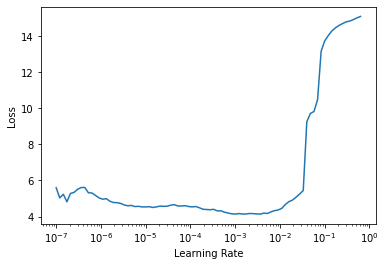

In [ ]:
learn.lr_find(suggestions=True)

In [ ]:
#running a batch to the model and output the shape
b = dls.one_batch()
preds = learn.model(b[0])
len(preds),preds[0], preds[1].shape

(4,
 tensor(5.3574, device='cuda:0', grad_fn=<NllLossBackward>),
 torch.Size([2, 69, 50264]))

In [ ]:
learn.fit_one_cycle(1, lr_max=1e-3, cbs=fit_cbs)

epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,time
0,0.529591,0.486917,0.575345,0.478473,0.531423,02:52


In [ ]:
learn.show_results(learner=learn, max_n=2)

,text,target,prediction
0,Rank_2011:1.0;Change_since_2006:0;Urban_Area:Dublin;Population_2011:1110627.0;Increase_since_2006:6.2%;County:County Dublin;;Rank_2011:2.0;Change_since_2006:0;Urban_Area:Cork;Population_2011:198582.0;Increase_since_2006:4.3%;County:County Cork;;Rank_2011:3.0;Change_since_2006:0;Urban_Area:Limerick;Population_2011:91454.0;Increase_since_2006:0.8%;County:County Limerick;;Rank_2011:4.0;Change_since_2006:0;Urban_Area:Galway;Population_2011:76778.0;Increase_since_2006:5.6%;County:County Galway;;Rank_2011:5.0;Change_since_2006:0;Urban_Area:Waterford;Population_2011:51519.0;Increase_since_2006:4.7%;County:County Waterford & County Kilkenny,Table List of urban areas in the Republic of Ireland by population has 99 rows and Column Rank 2011 has entries with unique values ranging between 99.0 and 1.0 and Column Change since 2006 has entries with uniques value between 0 and new and Column Urban Area has entries with uniques value between Dublin and Tullow,"The Rank 2011 is 1.0, with a Change since 2006 of 0, and with a Urban Area of Dublin, and 1110627.0 is the Population 2011, and Column Population 2011 has 10 entries with unique values ranging between 0 and County Kilkenny"
1,Year:1937;Men_s_singles:Walter R. Kramer;Women_s_doubles:Bertha Barkhuff Zoe Smith;Mixed_doubles:Hamilton B. Law Bertha Barkhuff;Men_s_doubles:Don Eversoll Chester Goss;Women_s_singles:Bertha Barkhuff;;Year:1938;Men_s_singles:Walter R. Kramer;Women_s_doubles:Helen Gibson Wanda Bergman;Mixed_doubles:Hamilton B. Law Bertha Barkhuff;Men_s_doubles:Hamilton B. Law Richard O. Yeager;Women_s_singles:Bertha Barkhuff;;Year:1939;Men_s_singles:David G. Freeman;Women_s_doubles:Bertha Barkhuff Zoe Smith;Mixed_doubles:Richard O. Yeager Zoe Smith;Men_s_doubles:Hamilton B. Law Richard O. Yeager;Women_s_singles:Mary E. Whittemore;;Year:1940;Men_s_singles,Table U S National Badminton Championships has 58 rows and Column Year has entries with uniques value between 1937 and 2012 and Column Men s singles has entries with uniques value between Walter R. Kramer and Sattawat Pongnairat and Column Women s doubles has entries with uniques value between Bertha Barkhuff Zoe Smith and Peng Yun Lee Joo Hyun,"The Year is 1937, with a Men s singles of Walter R. Kramer, and with a Women s doubles of Bertha Barkhuff Zoe Smith, and the Womens doubles is Helen Gibson Wanda Bergman, and Column Mixed doubles has 10 entries with 100.0 percent probability of Hamilton B. Law and Column Year has entries with uniques value between 1937 and 1940"
